<a href="https://colab.research.google.com/github/qahathaway/vBMD/blob/main/Google%20Colab/Colab%20Runtime%20Code%20for%20vBMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Google Colab worksheet illustrates Steps 3 and 4 of the "Semantic_Segmentation_Pectoralis.ipynb" Jupyter Notebook script on GitHub

# A) Change the system Python version to 3.8

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

--2023-07-08 16:21:00--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89817099 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  85.66M   147MB/s    in 0.6s    

2023-07-08 16:21:01 (147 MB/s) - ‘mini.sh’ saved [89817099/89817099]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py38_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py38_0
    - cffi==1.14.0=py38h2e261b9_0
    - chardet==3.0.4=py38_1003
    - conda-package-handling==1.6.0=py38h7b6447c_0
    - conda==4.8.2=py38_0
    - cryptography==2.8=

# B) **MANUALLY REFRESH THE WEB BROWSER**, Simply resarting the runtime will not work to incorporate Python 3.8 into the system runtime

# C) Comfirm that we are using Python 3.8

In [ ]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.8.17 (default, Jul  5 2023, 20:41:08) 
[GCC 11.2.0]


In [ ]:
!python --version

Python 3.8.17


# D) Clone the GitHub repository

In [ ]:
!git clone https://github.com/qahathaway/Automated_Segmentation_PTM-IMAT-SAT.git

Cloning into 'Automated_Segmentation_PTM-IMAT-SAT'...
remote: Enumerating objects: 2006, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 2006 (delta 20), reused 2 (delta 0), pack-reused 1978
Receiving objects: 100% (2006/2006), 190.30 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (1847/1847), done.
Filtering content: 100% (2/2), 416.60 MiB | 47.40 MiB/s, done.


# E) Make folders to contain analysis images

In [ ]:
!mkdir /content/Automated_Segmentation_PTM-IMAT-SAT/Selected
!mkdir /content/Automated_Segmentation_PTM-IMAT-SAT/Output
!mkdir /content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer

# F) Load dependencies for frame selection

In [ ]:
!pip install opencv-python
!pip install imutils

     |████████████████████████████████| 61.7 MB 1.2 MB/s 
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=fffb96d7c00d19debd1fb9666e5311940c35801dbb5be8e9955597beccb125d3
  Stored in directory: /root/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


# Step 3: Select the frame directly above the aortic arch

In [ ]:
### Load Essential Packages ###
import numpy as np
import pandas as pd
import os
import cv2
from imutils import paths
import argparse
import glob
from glob import iglob

n_white_pix = []
names = []
file_count = []
index = 0

### Select Frame Directly Above the Aorta ###
for filename in sorted(glob.glob('/content/Automated_Segmentation_PTM-IMAT-SAT/Example/**/axial_*.png'), key=lambda name: (name[53:61], int(os.path.basename(name)[14:-4]))):
    image = cv2.imread(filename)
    names.append(filename)
    pathlen, filenamed = os.path.split(filename)
    file_count = len(glob.glob1(pathlen,"axial_*.png"))
    image[image <= 80] = 0
    image[image >= 140] = 0
    cropped = image[165:360, 180:332]
    n_white_pix = np.append(n_white_pix, np.sum(cropped > 0))
    index += 1

### Select the Array of Images to Search and Apply Pixel Intensities to Stratify ###
    if index == file_count:
        lower = int(file_count*0.6)
        upper = int(file_count*0.85)
        minimum = (np.argmin(n_white_pix[lower:upper]) + lower)
        midline = cv2.imread(names[minimum])
        path, filenames = os.path.split(names[minimum])
        path2 = os.path.basename(path)
        cv2.imwrite('/content/Automated_Segmentation_PTM-IMAT-SAT/Selected/' + path2 + "_" + filenames, midline)

        n_white_pix = []
        names = []
        file_count = []
        index = 0

    else:
        continue

# **Display Images from Above Aortic Arch Selection**

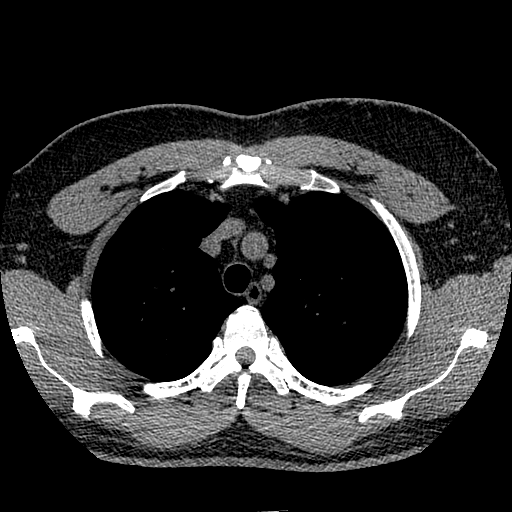

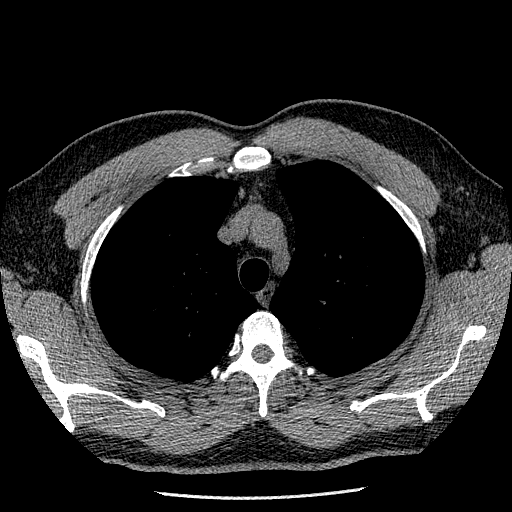

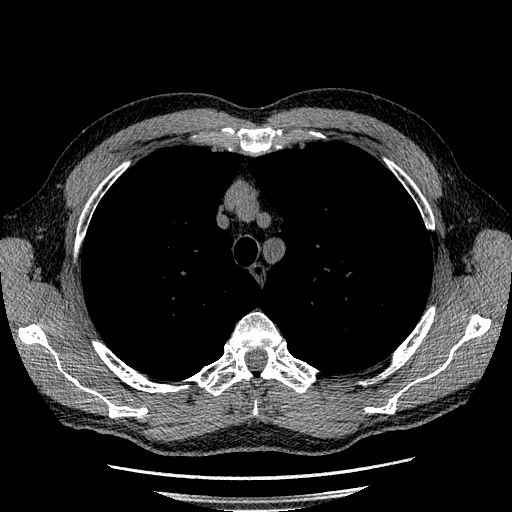

In [ ]:
from IPython.display import Image, display
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Selected/Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Selected/Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Selected/Patient3_axial_IM-2073_560.png'))

# G) Load dependencies for PixelLib and Mask R-CNN

In [ ]:
!pip install tensorflow==2.5.3
!pip install keras==2.4.3
!pip install numpy==1.19.5
!pip install pillow==8.2.0
!pip install PyQt5==5.15.5
!pip install pixellib==0.7.1
!pip install scikit-image==0.18.0
!pip install protobuf==3.20.0

     |████████████████████████████████| 460.4 MB 20 kB/s 
     |████████████████████████████████| 462 kB 57.8 MB/s 
     |████████████████████████████████| 5.6 MB 50.1 MB/s 
     |████████████████████████████████| 132 kB 46.6 MB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 14.9 MB 32.2 MB/s 
     |████████████████████████████████| 304 kB 49.1 MB/s 
     |████████████████████████████████| 4.4 MB 45.2 MB/s 
     |████████████████████████████████| 1.2 MB 46.4 MB/s 
     |████████████████████████████████| 4.0 MB 55.5 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 6.6 MB 44.7 MB/s 
     |████████████████████████████████| 242 kB 59.1 MB/s 
     |████████████████████████████████| 93 kB 1.9 MB/s 
     |████████████████████████████████| 151 kB 62.0 MB/s 
  Created wheel for ter

     |████████████████████████████████| 701 kB 8.0 MB/s 
     |████████████████████████████████| 34.5 MB 19 kB/s 
     |████████████████████████████████| 3.0 MB 3.5 MB/s 
     |████████████████████████████████| 8.3 MB 5.0 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
     |████████████████████████████████| 430 kB 5.0 MB/s 
     |████████████████████████████████| 948 kB 42.7 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 988 kB 39.3 MB/s 
     |████████████████████████████████| 840 kB 45.9 MB/s 
     |████████████████████████████████| 42 kB 746 kB/s 
     |████████████████████████████████| 13.9 MB 141 kB/s 
     |████████████████████████████████| 1.6 MB 26.2 MB/s 
     |████████████████████████████████| 154 kB 46.3 MB/s 
     |████████████████████████████████| 9.2 MB 64.2 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 104 kB 66.8 MB/s 
     |███████████████████

     |████████████████████████████████| 30.2 MB 1.2 MB/s 
     |████████████████████████████████| 98 kB 5.7 MB/s 
ERROR: matplotlib 3.7.2 has requirement numpy>=1.20, but you'll have numpy 1.19.5 which is incompatible.
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.21.0
    Uninstalling scikit-image-0.21.0:
      Successfully uninstalled scikit-image-0.21.0
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0


# H) Restart runtime to incorporate new packages

# Step 4: Custom semantic segmentation using Pixellib and Mask R-CNN for all remaining participants

In [ ]:
### Load Essential Packages ###
import pixellib
from pixellib.instance import custom_segmentation

### Custom Segmentation of Left PMAT, Right PMAT, and SAT ###
segment_image = custom_segmentation()
segment_image.inferConfig(num_classes = 3, class_names= ["BG", "PMR", "PML", "SAT"], detection_threshold = 0.9, network_backbone = "resnet50")
segment_image.load_model("/content/Automated_Segmentation_PTM-IMAT-SAT/COCO/95_MSK_3_Class.h5")

2023-07-08 16:48:17.452580: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead
2023-07-08 16:48:25.519197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-07-08 16:48:25.519318: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-08 16:48:25.519368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e6adcd069d0f): /proc/driver/nvidia/version does 

In [ ]:
### Load Essential Packages ###
import numpy as np
from PIL import Image
import cv2
import os

### Set Directories ###
inputdir = '/content/Automated_Segmentation_PTM-IMAT-SAT/Selected/'
outdir = '/content/Automated_Segmentation_PTM-IMAT-SAT/Output/'
outdir1 = '/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Mask_'
outdir2 = '/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_'
outdir3 = '/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Mask_'
outdir4 = '/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_'
outdir5 = '/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Mask_'
outdir6 = '/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_'

test_list = [ f for f in  os.listdir(inputdir)]

### Inference of Left PMAT, Right PMAT, and SAT Images Based on Mask R-CNN Model ###
for f in sorted (test_list):
    if f.endswith('.png'):
        segmask, output = segment_image.segmentImage(inputdir + f, extract_segmented_objects = False, mask_points_values = True, show_bboxes=False)
        class_list = segmask['class_ids'].tolist()
        class_str = ''.join(str(x) for x in class_list)
        try:
            if class_str == '321':
                c,b,a = [ [individualArray] for individualArray in segmask['masks'] ]
            elif class_str == '312':
                c,a,b = [ [individualArray] for individualArray in segmask['masks'] ]
            elif class_str == '231':
                b,c,a = [ [individualArray] for individualArray in segmask['masks'] ]
            elif class_str == '213':
                b,a,c = [ [individualArray] for individualArray in segmask['masks'] ]
            elif class_str == '132':
                a,c,b = [ [individualArray] for individualArray in segmask['masks'] ]
            else:
                a,b,c = [ [individualArray] for individualArray in segmask['masks'] ]
        except:
            pass

        cv2.imwrite(outdir + f, output)
        a1 = np.array(a)
        b1 = np.array(b)
        c1 = np.array(c)
        for i in a1.tolist():
            mask1 = np.asarray(Image.open(inputdir + f))
            mask11 =  mask1[:,:,:3]
            img1 = cv2.fillPoly(mask1, np.array(i), color=(0, 0, 0))
            maskB = Image.fromarray(mask11)
        for i in a1.tolist():
            mask2 = np.asarray(Image.open(inputdir + f))
            mask22 =  mask2[:,:,:3]
            img2 = cv2.fillPoly(mask2, np.array(i), color=(255, 255, 255))
            maskW = Image.fromarray(mask22)
            ROI_PMR_Mask = np.subtract(maskW, maskB)
            ROI_PMR = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB)
            cv2.imwrite(outdir1 + f, ROI_PMR_Mask)
            cv2.imwrite(outdir2 + f, ROI_PMR)
        for i in b1.tolist():
            mask3 = np.asarray(Image.open(inputdir + f))
            mask33 =  mask3[:,:,:3]
            img3 = cv2.fillPoly(mask3, np.array(i), color=(0, 0, 0))
            maskB2 = Image.fromarray(mask33)
        for i in b1.tolist():
            mask4 = np.asarray(Image.open(inputdir + f))
            mask44 =  mask4[:,:,:3]
            img4 = cv2.fillPoly(mask4, np.array(i), color=(255, 255, 255))
            maskW2 = Image.fromarray(mask44)
            ROI_SAT_Mask = np.subtract(maskW2, maskB2)
            ROI_SAT = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB2)
            cv2.imwrite(outdir3 + f, ROI_SAT_Mask)
            cv2.imwrite(outdir4 + f, ROI_SAT)
        for i in c1.tolist():
            mask5 = np.asarray(Image.open(inputdir + f))
            mask55 =  mask5[:,:,:3]
            img5 = cv2.fillPoly(mask5, np.array(i), color=(0, 0, 0))
            maskB3 = Image.fromarray(mask55)
        for i in c1.tolist():
            mask6 = np.asarray(Image.open(inputdir + f))
            mask66 =  mask6[:,:,:3]
            img6 = cv2.fillPoly(mask6, np.array(i), color=(255, 255, 255))
            maskW3 = Image.fromarray(mask66)
            ROI_PML_Mask = np.subtract(maskW3, maskB3)
            ROI_PML = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB3)
            cv2.imwrite(outdir5 + f, ROI_PML_Mask)
            cv2.imwrite(outdir6 + f, ROI_PML)

/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2023-07-08 16:50:14.277790: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -48 } dim { size: -206 } dim { size: -207 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } tensor_content: "\007\000\000\000\00

# **Display Images from Output Segmentation**

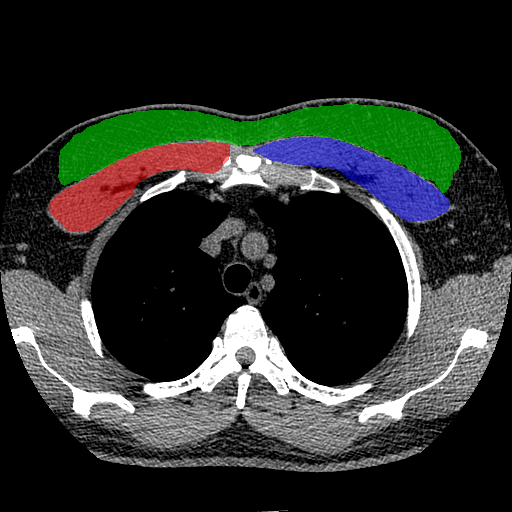

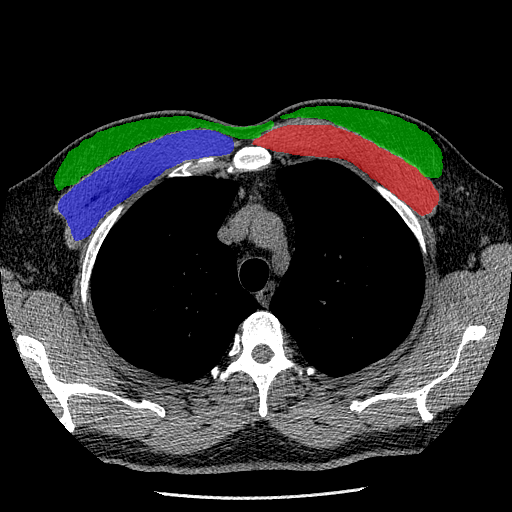

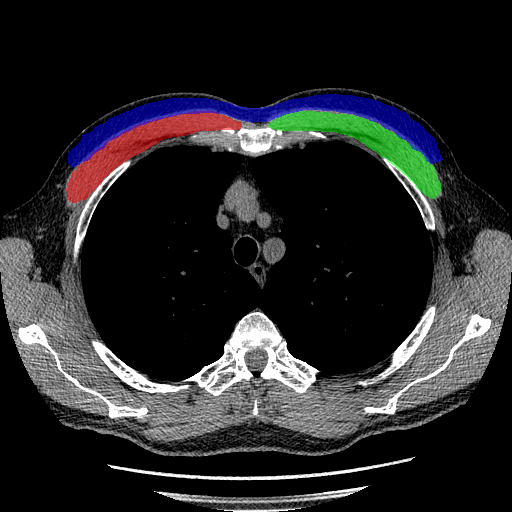

In [ ]:
from IPython.display import Image, display
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Output/Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Output/Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Output/Patient3_axial_IM-2073_560.png'))

# **Display Images from Left Pectoralis Muscle Segmentation**

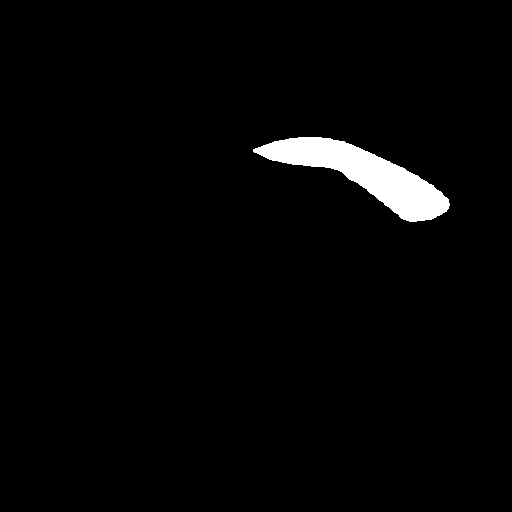

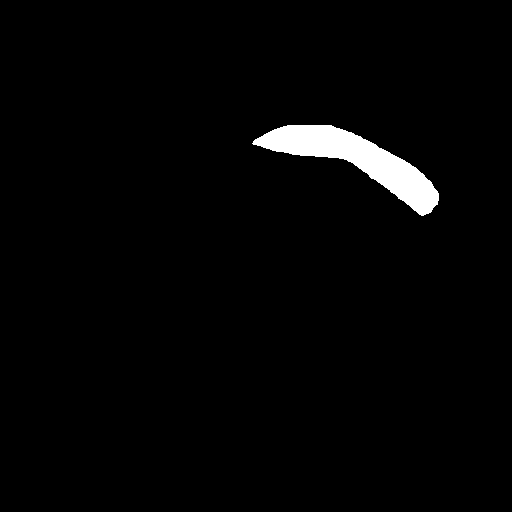

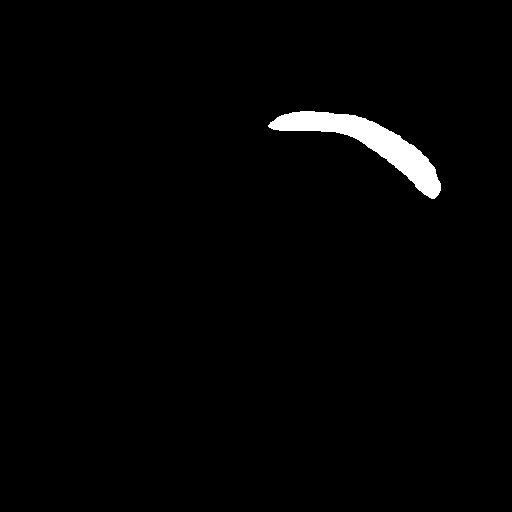

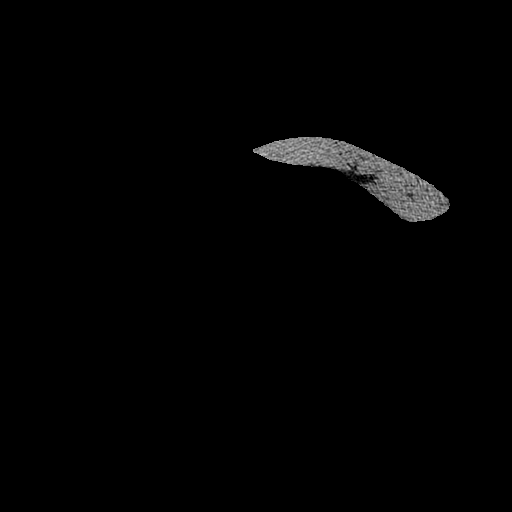

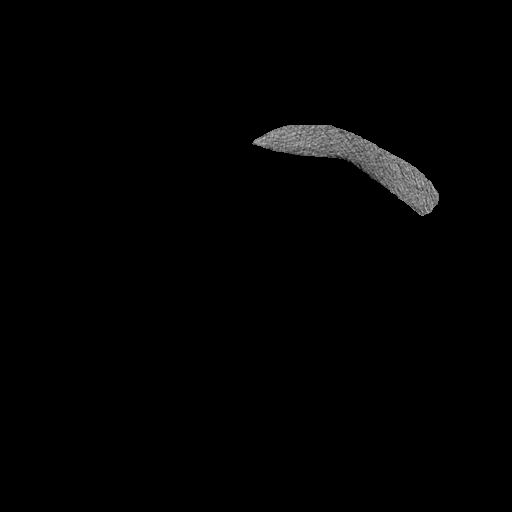

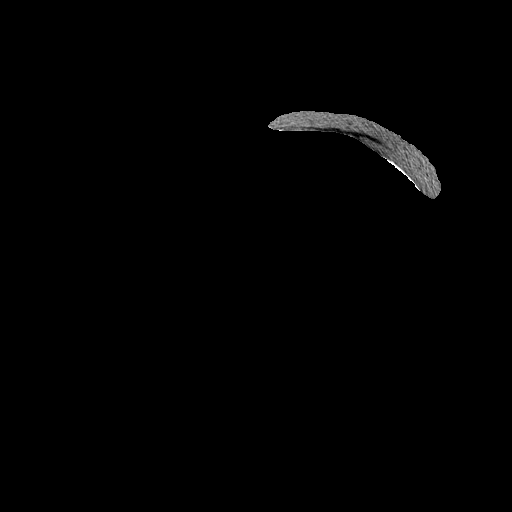

In [ ]:
from IPython.display import Image, display
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Mask_Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Mask_Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Mask_Patient3_axial_IM-2073_560.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PML_Patient3_axial_IM-2073_560.png'))

# **Display Images from Right Pectoralis Muscle Segmentation**

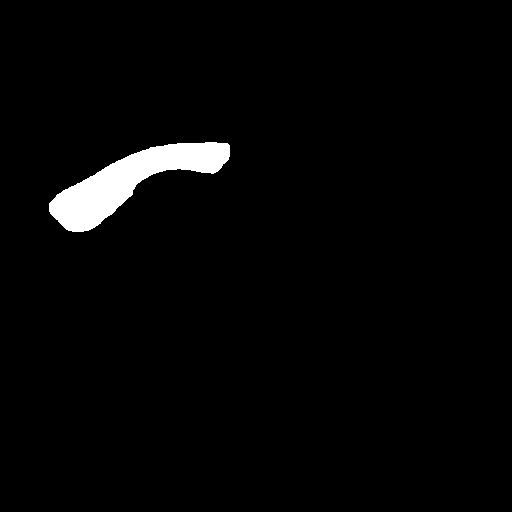

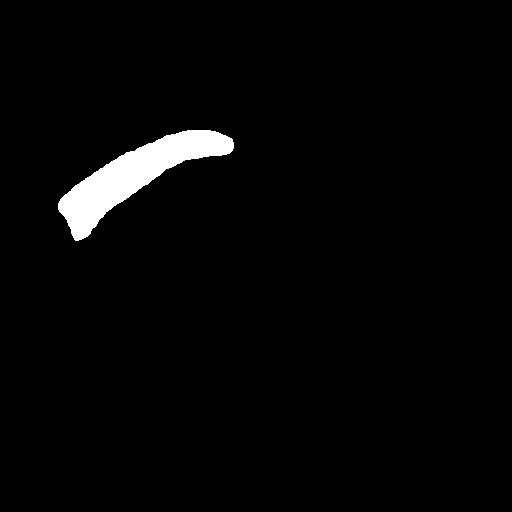

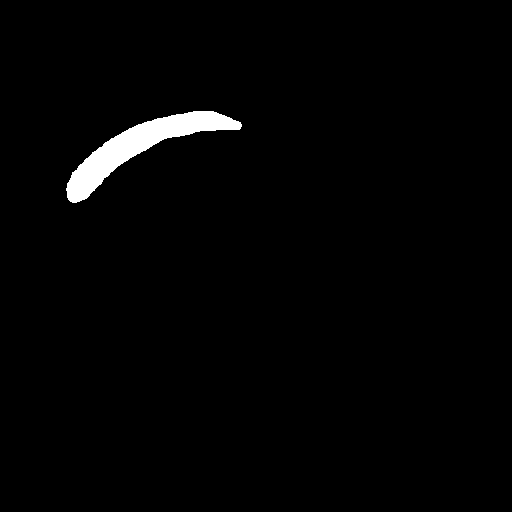

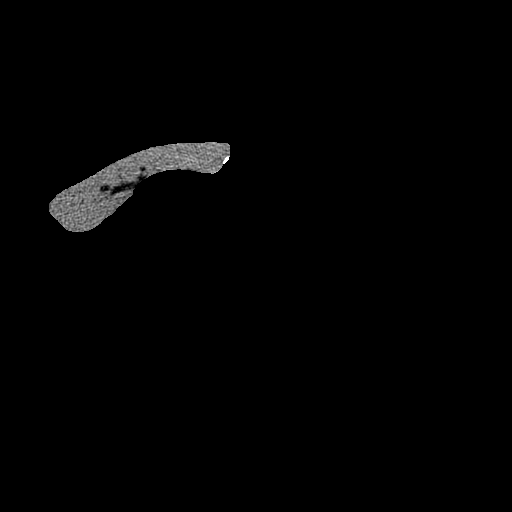

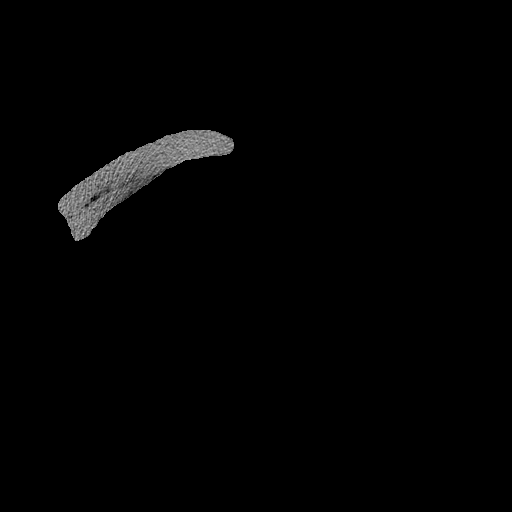

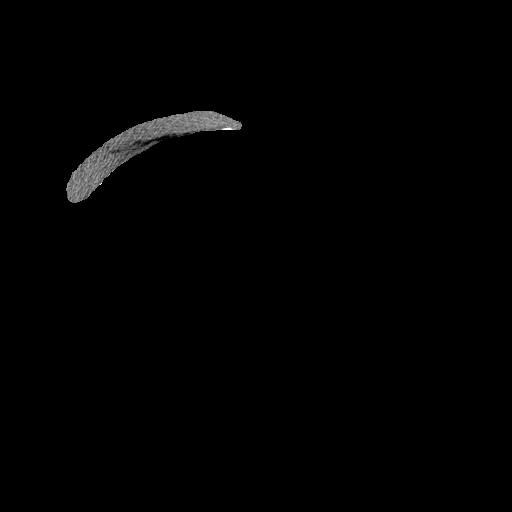

In [ ]:
from IPython.display import Image, display
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Mask_Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Mask_Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Mask_Patient3_axial_IM-2073_560.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/PMR_Patient3_axial_IM-2073_560.png'))

# **Display Images from Subcutaneous Adipose Tissue Segmentation**

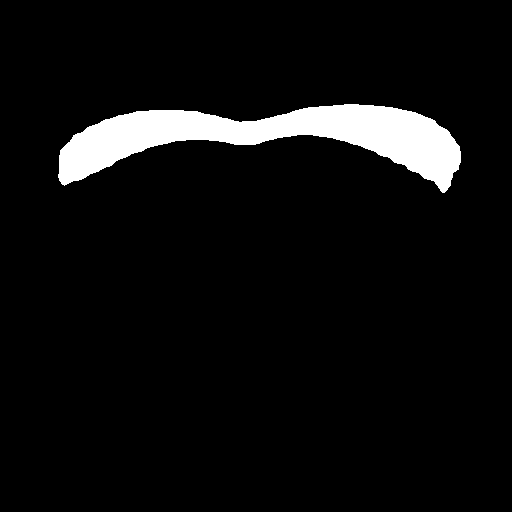

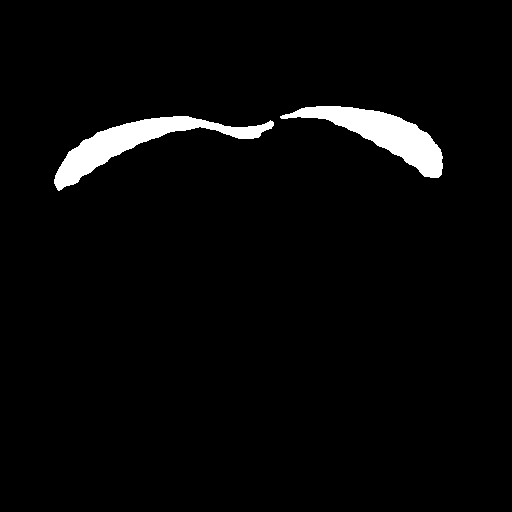

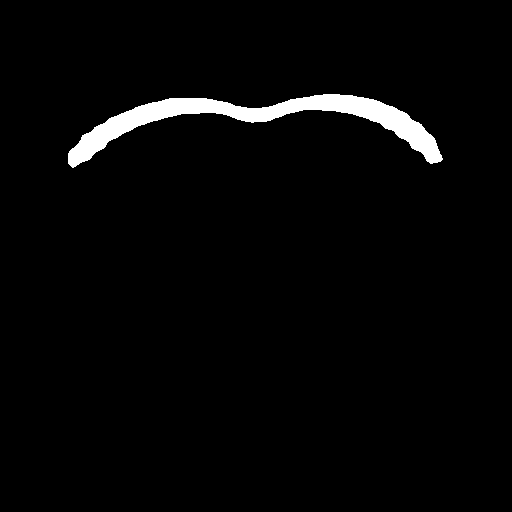

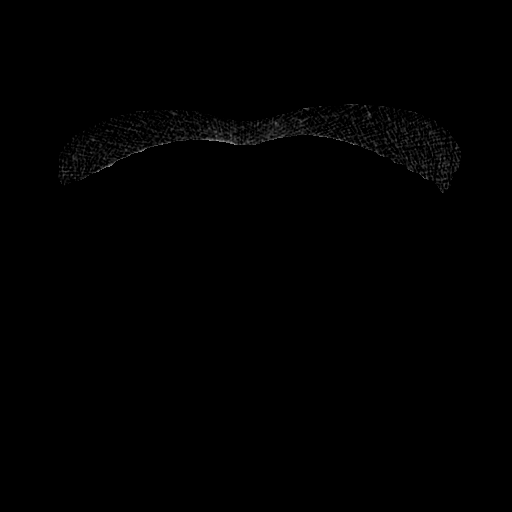

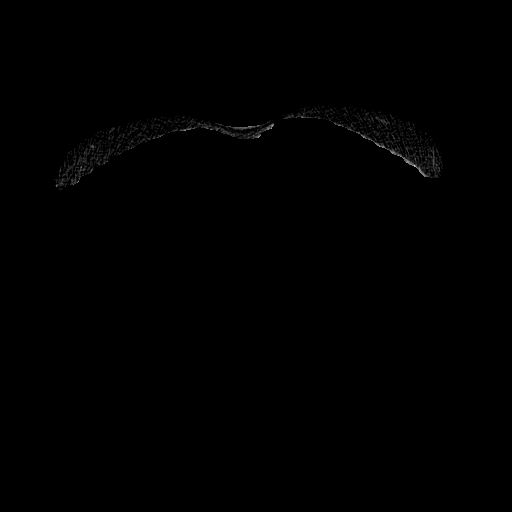

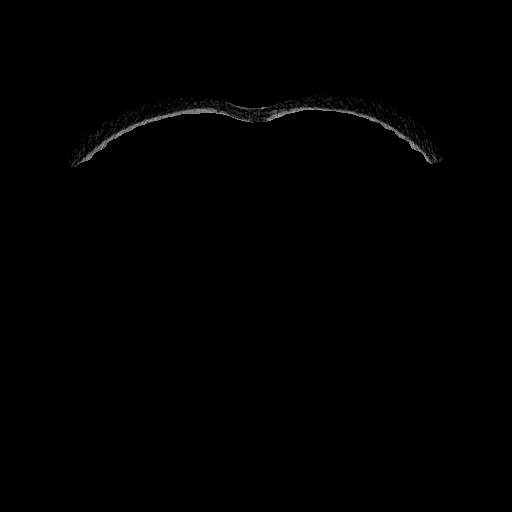

In [ ]:
from IPython.display import Image, display
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Mask_Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Mask_Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Mask_Patient3_axial_IM-2073_560.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Patient1_axial_IM-0730_450.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Patient2_axial_IM-0185_470.png'))
display(Image('/content/Automated_Segmentation_PTM-IMAT-SAT/Mask_Infer/SAT_Patient3_axial_IM-2073_560.png'))